# RSI & Bollinger Bands Strategy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2018-12-31'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


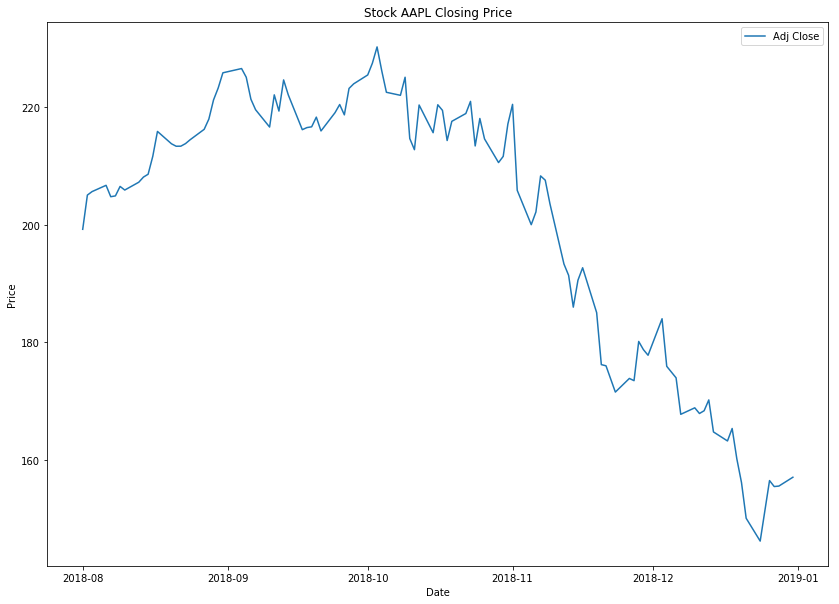

In [3]:
# Simple Line Chart
plt.figure(figsize=(14,10))
plt.plot(df['Adj Close'])
plt.legend(loc='best')
plt.title('Stock '+ symbol +' Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## RSI

In [4]:
import talib as ta

In [5]:
rsi = ta.RSI(df['Adj Close'], timeperiod=14)
rsi = rsi.dropna()
rsi

Date
2018-08-21    79.104871
2018-08-22    79.114058
2018-08-23    79.540524
2018-08-24    80.203382
2018-08-27    81.882790
2018-08-28    83.383755
2018-08-29    85.752712
2018-08-30    87.000185
2018-08-31    88.388786
2018-09-04    88.752068
2018-09-05    83.041064
2018-09-06    70.653076
2018-09-07    65.619678
2018-09-10    58.246306
2018-09-11    65.912718
2018-09-12    59.943364
2018-09-13    66.263664
2018-09-14    61.254313
2018-09-17    51.526255
2018-09-18    52.021893
2018-09-19    52.211924
2018-09-20    54.680286
2018-09-21    50.657256
2018-09-24    55.331409
2018-09-25    57.280716
2018-09-26    54.068198
2018-09-27    60.217641
2018-09-28    61.193416
2018-10-01    63.070254
2018-10-02    65.460960
                ...    
2018-11-15    35.745552
2018-11-16    38.000323
2018-11-19    33.429692
2018-11-20    29.070172
2018-11-21    28.978513
2018-11-23    26.925899
2018-11-26    29.708364
2018-11-27    29.511006
2018-11-28    37.406645
2018-11-29    36.493364
2018-11-30 

## Bollinger Bands

In [6]:
# Create Bollinger Band
# https://stockcharts.com/school/doku.php?id=chart_school:technical_indicators:bollinger_bands
df['20 Day MA'] = df['Adj Close'].rolling(window=20).mean()
df['20 Day STD'] = df['Adj Close'].rolling(window=20).std()
df['Upper Band'] = df['20 Day MA'] + (df['20 Day STD'] * 2)
df['Lower Band'] = df['20 Day MA'] - (df['20 Day STD'] * 2)

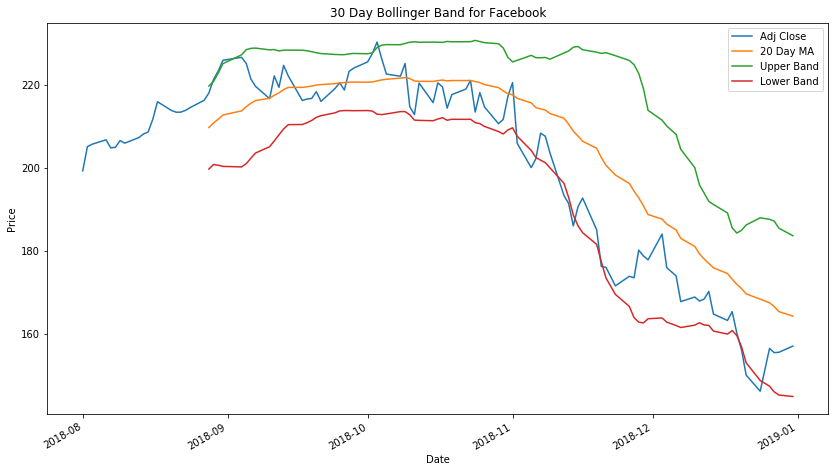

In [7]:
df[['Adj Close', '20 Day MA', 'Upper Band', 'Lower Band']].plot(figsize=(14,8))
plt.title('30 Day Bollinger Band for Facebook')
plt.ylabel('Price')
plt.legend(loc='best')
plt.show()

In [8]:
dfc = df.copy()
dfc = dfc.reset_index()

In [9]:
from matplotlib import dates as mdates
import datetime as dt

dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))

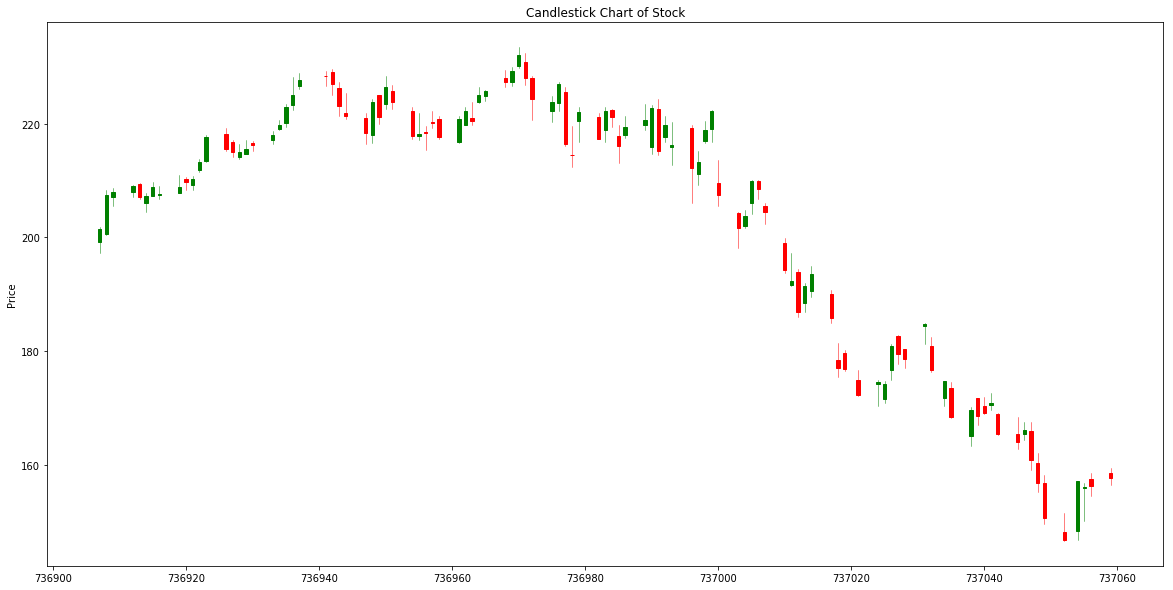

In [10]:
# This one has not date and is convert to number
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(20,10))
ax = plt.subplot(1,1,1)
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
plt.title('Candlestick Chart of Stock')
plt.ylabel('Price')
plt.show()

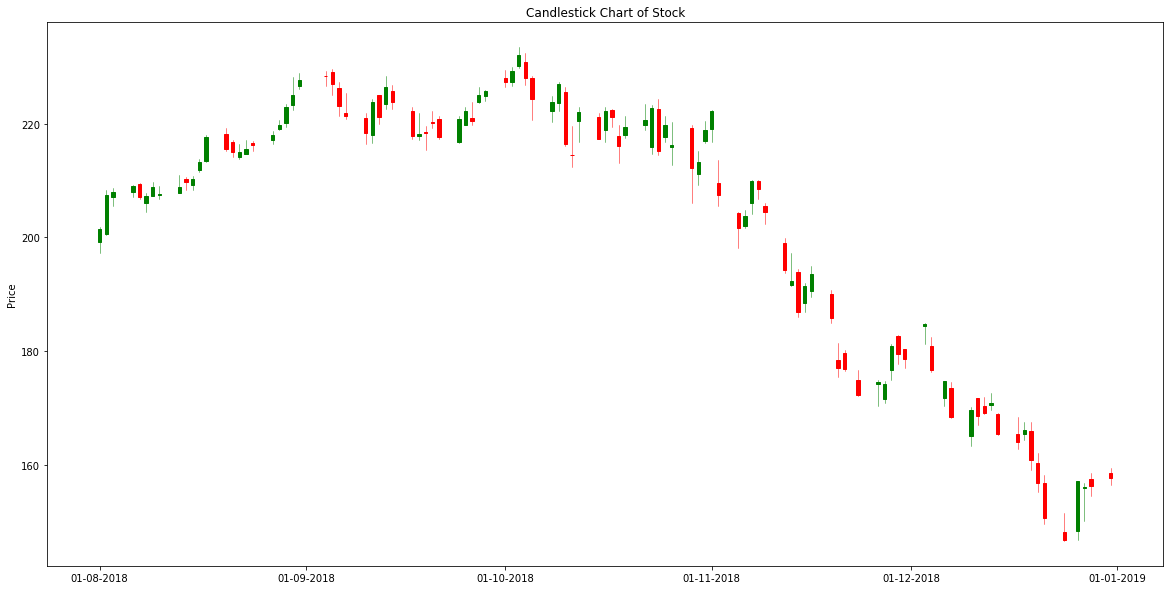

In [11]:
# Plot Candlestick with dates
fig = plt.figure(figsize=(20,10))
ax = plt.subplot(1,1,1)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
plt.title('Candlestick Chart of Stock')
plt.ylabel('Price')
plt.show()

## Combine RSI and Bollinger Bands

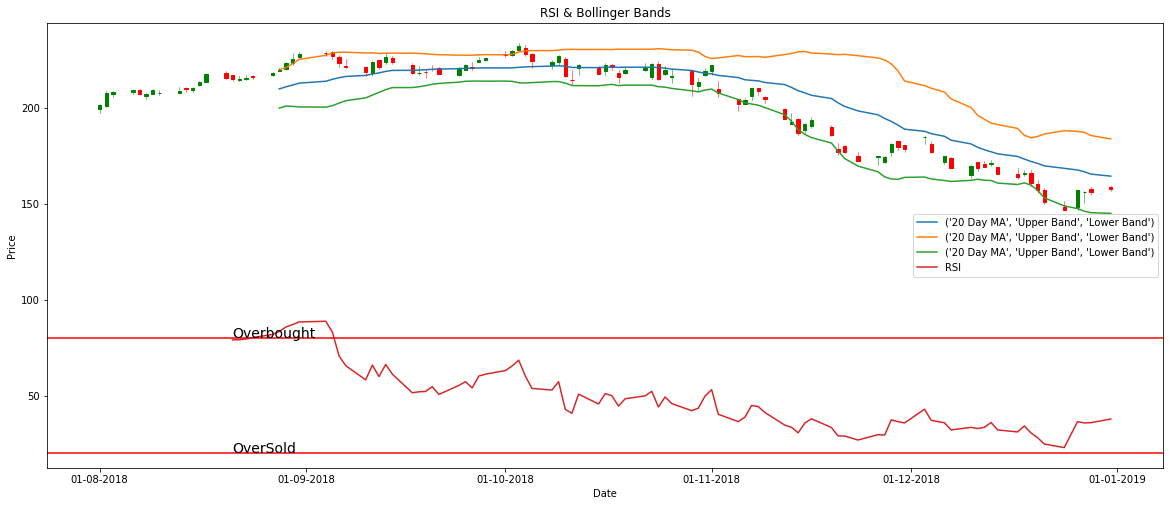

In [12]:
fig = plt.figure(figsize=(20,18))
ax = plt.subplot(2,1,2)
ax.xaxis_date()
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.plot(df[['20 Day MA', 'Upper Band', 'Lower Band']], label=('20 Day MA', 'Upper Band', 'Lower Band'))
candlestick_ohlc(ax,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
plt.title('RSI & Bollinger Bands')
plt.ylabel('Price')

plt.plot(rsi, '-', label='RSI')
plt.text(s='Overbought', x=rsi.index[0], y=80, fontsize=14)
plt.text(s='OverSold', x=rsi.index[0], y=20, fontsize=14)
ax.axhline(y=80,color='r')
ax.axhline(y=20,color='r')
plt.xlabel('Date')
plt.legend(loc='best')
plt.show()